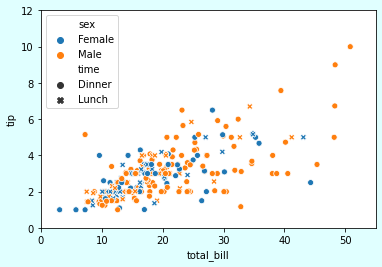

In [102]:
import seaborn as sb
import matplotlib.pyplot as plt


tips = sb.load_dataset("tips")

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor = 'lightcyan')
ax.set_xlim([0, 55])
ax.set_ylim([0, 12])
sb.scatterplot(x ='total_bill', y = 'tip', hue = 'sex', style = 'time', data = tips)
plt.show()

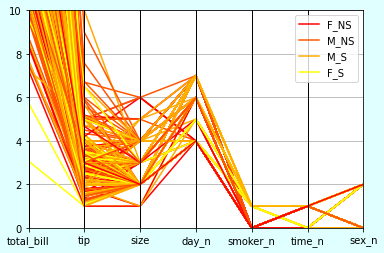

In [129]:
from pandas.plotting import parallel_coordinates


a = tips.assign(day_n = 1, smoker_n = 1, time_n = 1)

# def change_number(a, column, number):
    

a.loc[a["day"] == "Sun","day_n"] = 7
a.loc[a["day"] == "Sat","day_n"] = 6
a.loc[a["day"] == "Fri","day_n"] = 5
a.loc[a["day"] == "Thur","day_n"] = 4

del a['day']

a.loc[a["time"] == "Dinner","time_n"] = 1
a.loc[a["time"] == "Lunch","time_n"] = 0

del a['time']

a.loc[a["smoker"] == "Yes","smoker_n"] = 1
a.loc[a["smoker"] == "No","smoker_n"] = 0

del a['smoker']

a.loc[a["sex"] == "Male","sex_n"] = 0
a.loc[a["sex"] == "Female","sex_n"] = 2

del a['sex']

last = a.assign(type = a['sex_n'] + a['smoker_n'])

last1 = last.assign(type_name = 's')

last1.loc[last1["type"] == 0,"type_name"] = "M_NS" 
last1.loc[last1["type"] == 1,"type_name"] = "M_S" 
last1.loc[last1["type"] == 2,"type_name"] = "F_NS" 
last1.loc[last1["type"] == 3,"type_name"] = "F_S" 

del last1['type']

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor = 'lightcyan')
ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
parallel_coordinates(last1, class_column= 'type_name', colormap = 'autumn') 
plt.show()


       

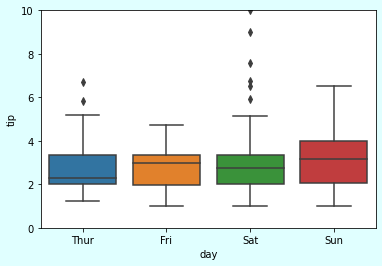

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor = 'lightcyan')
ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
sb.boxplot(x = "day", y = "tip", data = tips)  
plt.show()
 

